# Basic usage of the vonMisesMixtures package


A [von Mises distribution]() is a periodic distribution defined by its probability density function (pdf) : 

$$f(x\mid\mu,\kappa)=\frac{e^{\kappa\cos(x-\mu)}}{2\pi I_0(\kappa)}$$

with the two parameters $\mu$, the center of the distribution, and $\kappa$, a parameter related to the width of the distribution. The distribution is more and more spread for small $\kappa$, down to a uniform distribution when $\kappa = 0$. 

Note that $I_{0}$ is the zero-th order Bessel function of first kind. It is here for normalization purpose only, so do not bother about it too much.

In [1]:
import vonMisesMixtures as vonmises
print(vonmises.__version__)

import matplotlib.pyplot as plt
import numpy as np

1.0.0


## Simple von Mises distribution

One first generates a simple von Mises distribution, without mixture. We call the `numpy.random.vonmises(mu, kappa, sample_size)` method to generate a random sample. Then we plot a histogram of this sample. To display the histogram, we call the `histogram` method of Numpy, and then we associate the frequency (divided by the total frequency, i.e. the sample size) to the middle of the bin coordinates. This is rewritten in the package as the `tools.histogram(series)` method.

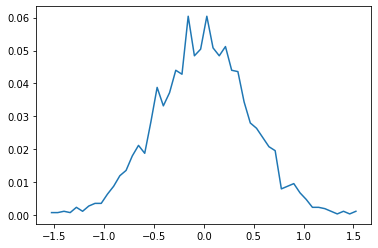

In [2]:
x = np.random.vonmises(0, 5, 2500)
x_histo = vonmises.tools.histogram(x)
plt.plot(*x_histo)

## `density(x, mu, kappa)`

The method `density(x: np.array, mu: np.array, kappa: np.array)` constructs the density of the von Mises distribution for each point of `x`, and for each $\mu$ and each $\kappa$ of the von Mises distribution. Here the points are `x_histo[0]` in order to compare with the above histogram. 

In [3]:
fit_pdf = vonmises.density(x_histo[0], mu=0, kappa=5)
fit_pdf

array([0.00724129, 0.0098791 , 0.01345034, 0.01825341, 0.02466237,
       0.03313588, 0.04422191, 0.05855516, 0.07684375, 0.09984111,
       0.12829998, 0.16290612, 0.20419231, 0.2524363 , 0.30755105,
       0.36897997, 0.4356138 , 0.50574771, 0.57709605, 0.64687703,
       0.71197121, 0.7691457 , 0.81532375, 0.8478687 , 0.8648448 ,
       0.86521773, 0.84896458, 0.81707632, 0.77145232, 0.71470332,
       0.64989252, 0.58025182, 0.50891089, 0.43867042, 0.37184045,
       0.3101524 , 0.25474147, 0.20618725, 0.16459553, 0.12970241,
       0.10098418, 0.07775992, 0.0592783 , 0.0447848 , 0.03356859,
       0.0249913 , 0.018501  , 0.01363512, 0.010016  , 0.00734212])

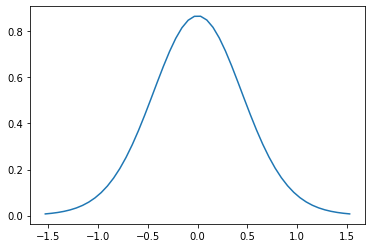

In [4]:
plt.plot(x_histo[0], fit_pdf)

The fit is an exact calculation from the definition above, so it's a smooth function. Let us compare the two plots.

NB : We have to normalize the two histograms the same way (dividing by their integrals) in order to compare them.

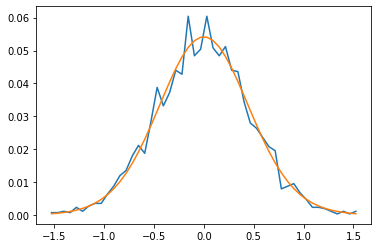

In [5]:
plt.plot(*x_histo)
plt.plot(x_histo[0], fit_pdf/np.sum(fit_pdf))
plt.show()

One sees that one may fit the 2500 points of the sample using just two parameters $\kappa$ and $\mu$. The aim of this package is to reduce a ful set of stochastic data to a few parameters.

## `pdfit(series)`

Indeed, usually we have the series `x` without any idea of the best fit to it. For periodic datas, a von Mises distribution is usually worth a try. In order to obtain the $\mu$ and $\kappa$ parameters associated to `x`, one can use the `pdfit` function of the package. It evaluates the most probable parameters for the distribution, in the hypothesis that this distribution is a von Mises one. Let us see how it works in our case.

In [6]:
mu, kappa = vonmises.pdfit(x)
print("mu = {:.4f}, kappa = {:.4f}".format(mu,kappa))

mu = -0.0081, kappa = 5.1079


We obtained estimators that are quite close to the original ones.

## `mixture_pdfit(series, n, threshold)`

If the random sample is supposed to correspond to a mixture of several von Mises distributions, one can use the `mixture_pdfit` to obtain an estimation of the parameters of the distributions.

Let us illustrate this with a two component mixture. This mixture is constructed by the tools `generate_mixture`.

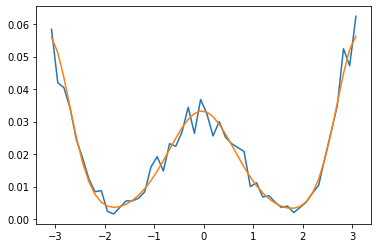

In [7]:
# generate the random sample artificially
x = vonmises.tools.generate_mixtures(sample_size=2500)
# create the histogram
x_histo = vonmises.tools.histogram(x)

# this is the main function: fit the datas to a mixture of
# 2 von Mises distributions
params = vonmises.mixture_pdfit(x, n=2)

# the rest is for plotting everything
plt.plot(*x_histo)
fit_x = np.zeros(len(x_histo[0]))
for i in range(params.shape[1]):
    fit_x_temp = vonmises.vonmises_density(x_histo[0],params[1,i],params[2,i])
    fit_x_temp = params[0,i]*fit_x_temp/np.sum(fit_x_temp)
    fit_x += fit_x_temp
plt.plot(x_histo[0],fit_x)
plt.show()

Let's print the parameters that one found for each distribution.

In [8]:
def pprint(params):
    s = "Prob. vonMises(mu=x.xxx, kappa=x.xxx)"
    print(s)
    print("-"*len(s))
    n = params.shape[1]
    s = ""
    for line in range(n):
        tup = tuple(params[:,line])
        s += "{:.3f} vonMises(mu={:.3f}, kappa={:.3f})".format(*tup)
        if line!=n-1:
            s += " + \n"
    print(s)

pprint(params)

Prob. vonMises(mu=x.xxx, kappa=x.xxx)
-------------------------------------
0.493 vonMises(mu=-0.039, kappa=2.135) + 
0.507 vonMises(mu=3.131, kappa=5.160)


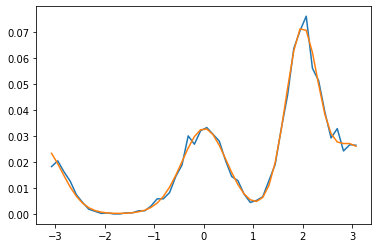

In [9]:
# generate the artificial datas
x = vonmises.tools.generate_mixtures(p=[0.3,0.5,0.2],
                                     mus=[0,2,3.1],kappas=[5,8,7],
                                     sample_size=5000)
x_histo = vonmises.tools.histogram(x)

# this is the main function: fit the datas to a mixture of
# 2 von Mises distributions
params = vonmises.mixture_pdfit(x, n=3)

# the following is for plotting only
plt.plot(*x_histo)
fit_x = np.zeros(len(x_histo[0]))
for i in range(params.shape[1]):
    fit_x_temp = vonmises.density(x_histo[0],params[1,i],params[2,i])
    fit_x_temp = params[0,i]*fit_x_temp/np.sum(fit_x_temp)
    fit_x += fit_x_temp
plt.plot(x_histo[0],fit_x)
plt.show()

Let's print the parameters that one founds for each distribution.

In [10]:
pprint(params)

Prob. vonMises(mu=x.xxx, kappa=x.xxx)
-------------------------------------
0.474 vonMises(mu=1.989, kappa=9.006) + 
0.306 vonMises(mu=0.014, kappa=4.875) + 
0.221 vonMises(mu=3.008, kappa=5.698)


In [11]:
from datetime import datetime
print("Last modification {}".format(datetime.now().strftime("%c")))

Last modification Tue Oct  5 20:53:17 2021
